In [1]:
#!pip install nltk
import nltk
import pandas as pd
import geopandas as gpd
from IPython.display import Markdown, display
import shapefile
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import pyLDAvis.gensim_models
import numpy as np
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import pos_tag
from nltk.classify import NaiveBayesClassifier
import matplotlib.font_manager as fm
import gensim
from gensim import corpora, models
from collections import Counter
import seaborn as sns


#font_path = 'C:\\Users\\paton\\Documents\\_Glasgow Univ MSc\\_yr2_dissertation\\python\\Open_Sans\\OpenSans-VariableFont_wdth,wght.ttf'
#fm.fontManager.addfont(font_path)

C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


## Read in data for Planning Applications with subset option

In [2]:
#read in planning app data
subset_size = 5000  # Specify the size of the random subset you want
planapp_gdf_read = gpd.read_file('D:\\_Glasgow Univ MSc\\_dissertation_data\\other\\Planning_Applications_CCF_PREMIUM_-_Scotland-sh_plnapp_premium pub_plnapppol\\pub_plnapppol.shp')
planapp_gdf = planapp_gdf_read.sample(n=subset_size)


## Read in data for LDPs

In [3]:
#read in LDP data
#planldp_gdf = gpd.read_file('D:\\_Glasgow Univ MSc\\_dissertation_data\\other\\AttributeRemover_3_Output_area.shp')

## Define columns for Description, Application, Status, Proposal and for LDPs for Type and Text of Type

In [4]:
#create columns for later handling
planapp_gdf["text_proposal"] = planapp_gdf["proposal"]
planapp_gdf["text_desc"] = planapp_gdf["dev_desc"]
planapp_gdf["text_app"] = planapp_gdf["appl_desc"]
planapp_gdf["text_status"] = planapp_gdf["stat_desc"]
#planldp_gdf["text_type1"] = planldp_gdf["type"]
#planldp_gdf["text_type2"] = planldp_gdf["text_type1"]


## Text preprocessing function

In [5]:
def text_preprocessing(text):
    if text is None:
        return []  # Return an empty list if text is None
    # Convert words to lower case
    text = text.lower()
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]
    
    return text

def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

# Single version for processing selected columns, singly or in parallel

## 1. Select the column for processing (code into drop down?)

In [6]:
#planapp_gdf["text_desc"] 
#planapp_gdf["text_app"] 
#planapp_gdf["text_status"] 
#planapp_gdf["text_proposal"]

planapp_gdf["feature"] = planapp_gdf["text_proposal"]
planapp_gdf["feature_unsplit"] = planapp_gdf["text_proposal"]

## 2. Word Clouds
## 3. Apply text preprocessing function to Description

In [7]:
# Create a list of review by applying text_preprocessing function
planapp_gdf["feature"] = list(map(text_preprocessing, planapp_gdf.feature))

# Return to string with to_string function
planapp_gdf['feature_clean'] = list(map(to_string, planapp_gdf["feature"]))

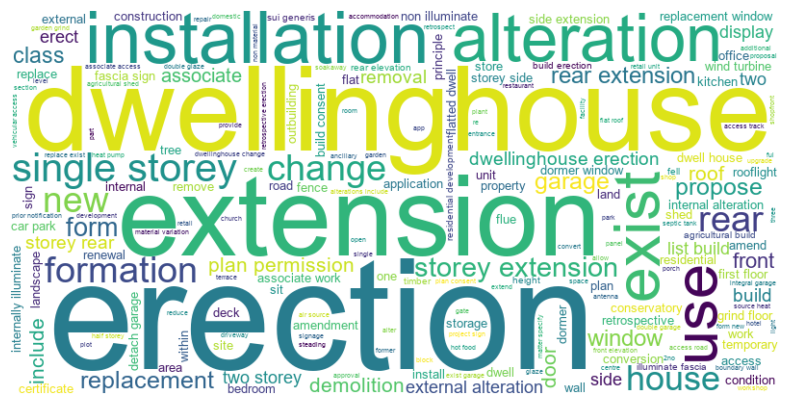

In [8]:
# further word cloud needed for tokenised text
text_app_series = planapp_gdf["feature_clean"]
data = ' '.join(text_app_series.astype(str))
font_path = 'C:\\Windows\\Fonts\\arial.ttf'  # Specify the TrueType font file
wordcloud = WordCloud(font_path=font_path,background_color='white',width=800,height=400).generate(data)
# Display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3. Term count and chart of phrases and tokens (selectable count threshold below for "most_frequent")



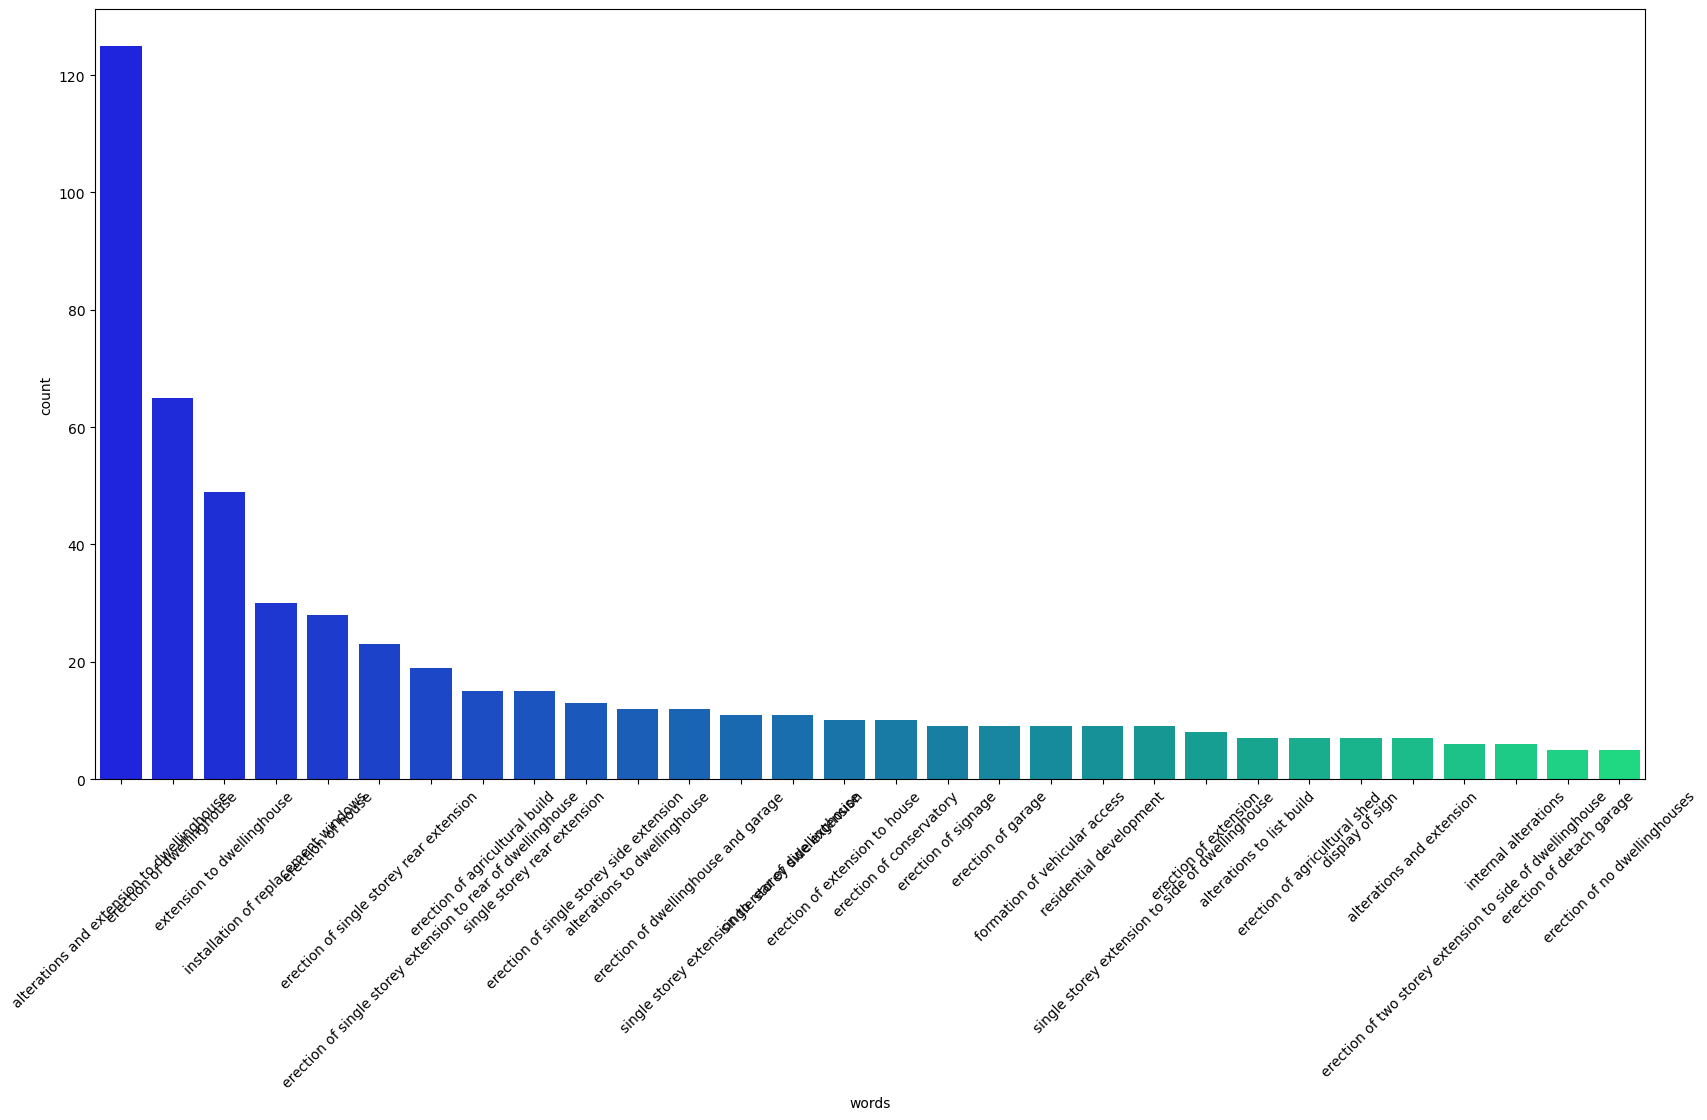

Counter({'alterations and extension to dwellinghouse': 125, 'erection of dwellinghouse': 65, 'extension to dwellinghouse': 49, 'installation of replacement windows': 30, 'erection of house': 28, 'erection of single storey rear extension': 23, 'erection of single storey extension to rear of dwellinghouse': 19, 'erection of agricultural build': 15, 'single storey rear extension': 15, 'erection of single storey side extension': 13, 'alterations to dwellinghouse': 12, 'erection of dwellinghouse and garage': 12, 'single storey extension to rear of dwellinghouse': 11, 'single storey side extension': 11, 'erection of extension to house': 10, 'erection of conservatory': 10, 'erection of signage': 9, 'erection of garage': 9, 'formation of vehicular access': 9, 'residential development': 9, 'single storey extension to side of dwellinghouse': 9, 'erection of extension': 8, 'alterations to list build': 7, 'erection of agricultural shed': 7, 'display of sign': 7, 'alterations and extension': 7, 'er

In [9]:
#phrases
word_counter = Counter(planapp_gdf["feature_clean"])
most_frequent = word_counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20, 10))
_ = pd.DataFrame(most_frequent, columns=("words", "count"))
sns.barplot(x='words', y='count', data=_, palette='winter')
plt.xticks(rotation=45)

plt.show()

print(word_counter)

Counter({'of': 5421, 'to': 3093, 'and': 2956, 'erection': 1654, 'extension': 1251, 'dwellinghouse': 915, 'rear': 775, 'alterations': 762, 'installation': 673, 'storey': 641, 'exist': 637, 'the': 539, 'with': 537, 'house': 519, 'use': 516, 'single': 493, 'for': 455, 'build': 432, 'garage': 425, 'new': 420, 'change': 405, 'formation': 369, 'replacement': 333, 'side': 330, 'associate': 319, 'in': 313, 'form': 310, 'class': 294, 'access': 292, 'roof': 282, 'plan': 265, 'windows': 263, 'dwell': 262, 'propose': 254, 'include': 249, 'front': 246, 'external': 244, 'from': 240, 'sign': 230, 'two': 229, 'on': 224, 'illuminate': 219, 'work': 216, 'at': 205, 'window': 205, 'permission': 194, 'internal': 180, 'erect': 178, 'garden': 176, 'demolition': 174, 'wall': 173, 'elevation': 170, 'as': 167, 'area': 164, 'park': 160, 'floor': 157, 'no': 156, 'tree': 155, 'grind': 146, 'non': 146, 'residential': 143, 'retrospective': 140, 'detach': 139, 'removal': 139, 'one': 137, 'condition': 131, 'agricultur

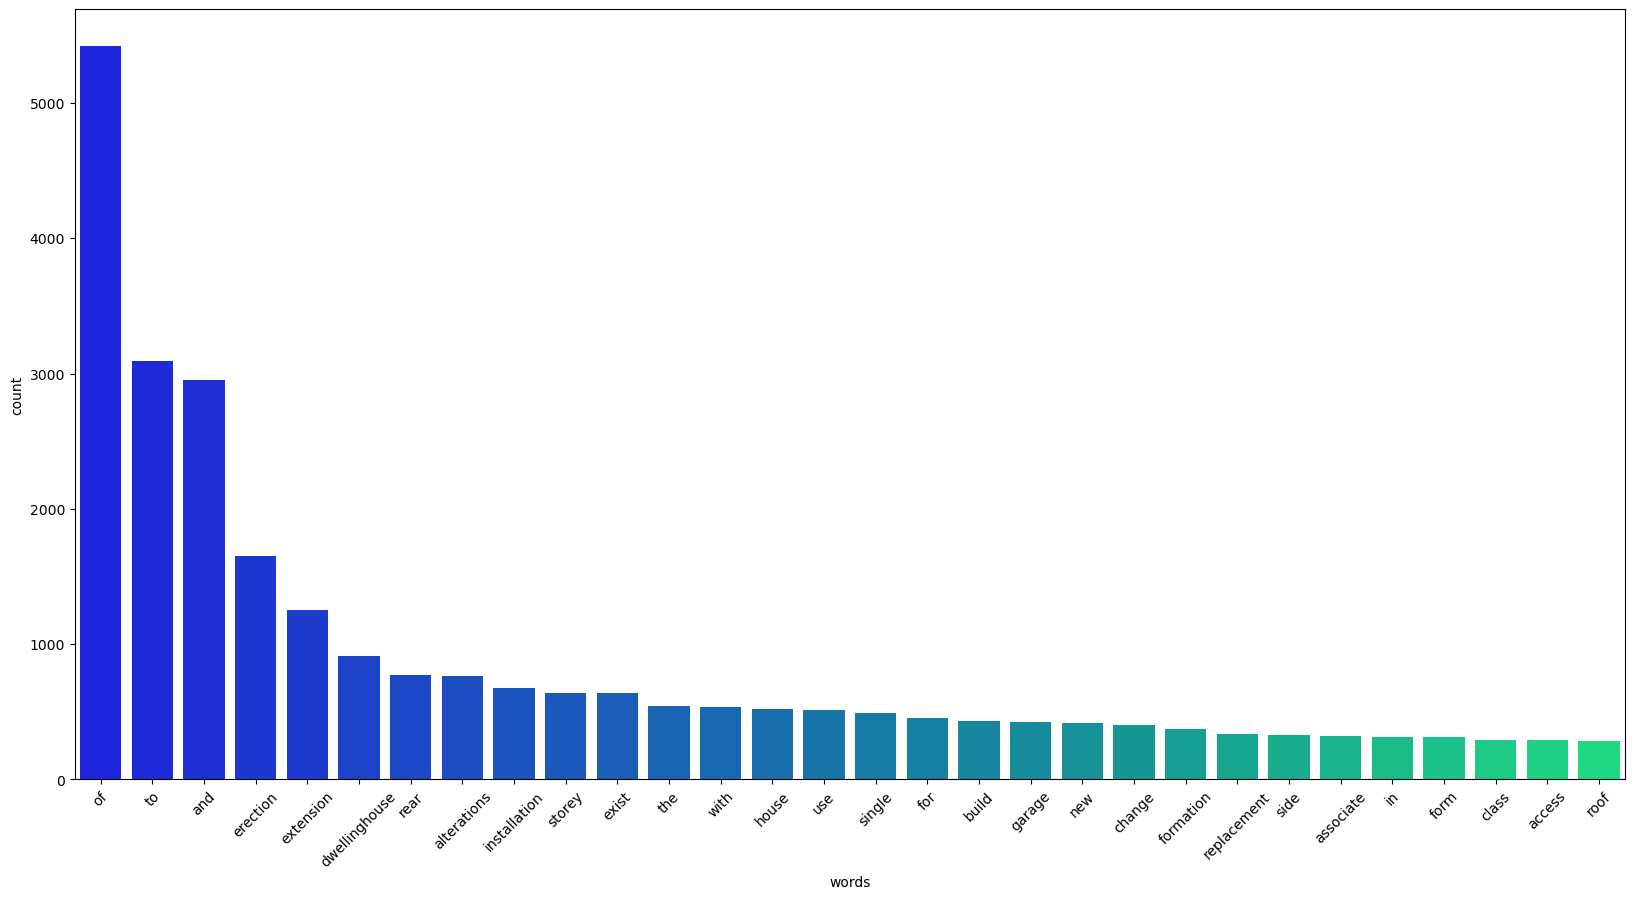

In [10]:
# token words
# Join all word corpus
desc_words = ' '.join(list(planapp_gdf['feature_clean'].values))

# Count and find the 30 most frequent
word_counter = Counter(desc_words.split())
most_frequent = word_counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20, 10))
_ = pd.DataFrame(most_frequent, columns=("words", "count"))
sns.barplot(x='words', y='count', data=_, palette='winter')
plt.xticks(rotation=45)

print(word_counter)

## 4a. Tokenisation and LDM modelling with coherence score plot - Phrases

In [11]:
#desc_list = [desc.split() for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]
desc_list = [[desc] for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]


In [12]:
desc_list

[['erection of single storey extension to rear of flatted dwell'],
 ['replacement of static illuminate advert unit with combine digital and static illuminate unit'],
 ['alterations to provide fully accessible access and new entrance include lift provision to all level within the exist school build'],
 ['single storey extension to front of dwellinghouse'],
 ['erect conservatory at'],
 ['change of use of dwellinghouse class to day nursery class 10'],
 ['single storey extension to rear'],
 ['erection of signage'],
 ['erection of storey rear extension to dwell and formation of extension to rear dormer'],
 ['install replacement windows doors and rooflights internal alterations amendment to 18 278 lb'],
 ['amendment to consent 16 02345 ful change house type'],
 ['retrospective change of use of domestic garage to beauty salon at'],
 ['erection of detach garage'],
 ['erection of two storey extension to southeast and single storey extension with roof terrace to southwest'],
 ['section 42 applic

In [13]:
# Version for the phrases not the single words

# Filter out non-string values
# Filter out non-string values
desc_list = [[desc] for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]

# Create Dictionary
id2word = gensim.corpora.Dictionary(desc_list)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in desc_list]

from gensim.models import CoherenceModel, LdaMulticore

# Compute coherence score
number_of_topics = []
coherence_score = []

for i in range(1, 5): #change back to 20
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=id2word,
                             iterations=5,
                             num_topics=i,
                             workers=8)
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=desc_list,
                                         dictionary=id2word,
                                         coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

    # Print coherence score for each iteration
    print(f"Iteration {i}: Coherence Score = {coherence_lda}")


Iteration 1: Coherence Score = -22.34999656419571
Iteration 2: Coherence Score = -22.320292533328654
Iteration 3: Coherence Score = -22.240389254273794
Iteration 4: Coherence Score = -21.943191739423888


In [14]:
desc_list

[['erection of single storey extension to rear of flatted dwell'],
 ['replacement of static illuminate advert unit with combine digital and static illuminate unit'],
 ['alterations to provide fully accessible access and new entrance include lift provision to all level within the exist school build'],
 ['single storey extension to front of dwellinghouse'],
 ['erect conservatory at'],
 ['change of use of dwellinghouse class to day nursery class 10'],
 ['single storey extension to rear'],
 ['erection of signage'],
 ['erection of storey rear extension to dwell and formation of extension to rear dormer'],
 ['install replacement windows doors and rooflights internal alterations amendment to 18 278 lb'],
 ['amendment to consent 16 02345 ful change house type'],
 ['retrospective change of use of domestic garage to beauty salon at'],
 ['erection of detach garage'],
 ['erection of two storey extension to southeast and single storey extension with roof terrace to southwest'],
 ['section 42 applic

   ## Coherence lineplot of phrases

<AxesSubplot:xlabel='number_of_topics', ylabel='coherence_score'>

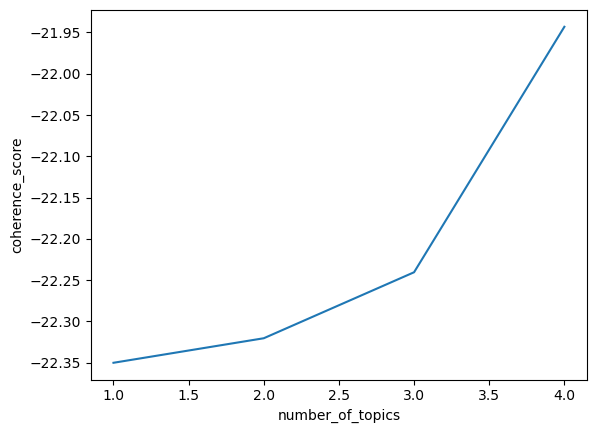

In [15]:
topic_coherence = pd.DataFrame({'number_of_topics': number_of_topics,
                                'coherence_score': coherence_score})
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [16]:
# Define the number of topics 
n_topics = 17

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [17]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.000*"erection of house" + 0.000*"extension to dwellinghouse" + 0.000*"alterations and extension to dwellinghouse" + 0.000*"erection of dwellinghouse" + 0.000*"erection of and storey detach dwell house" + 0.000*"vary condition from 00am to 00am" + 0.000*"alterations to shopfront and installation of roller shutter" + 0.000*"demolition of garage and erection of studio garden room" + 0.000*"change of use of agricultural shed to form horse livery stable for private and commercial use" + 0.000*"display of one internally illuminate wrap round fascia sign and one double side internally illuminate pole mount sign"
Topic: 1 Word: 0.000*"erection of house" + 0.000*"extension to dwellinghouse" + 0.000*"alterations and extension to dwellinghouse" + 0.000*"erection of dwellinghouse" + 0.000*"erection of and storey detach dwell house" + 0.000*"vary condition from 00am to 00am" + 0.000*"alterations to shopfront and installation of roller shutter" + 0.000*"demolition of garage and erec

## Visualisation of phrases by topic

In [18]:
pyLDAvis.enable_notebook()

# Prepare the visualization data
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)

# Convert topic_info to a DataFrame
topic_info_df = pd.DataFrame(vis_data.topic_info)

# Convert token_table to a DataFrame
token_table_df = pd.DataFrame(vis_data.token_table)

# Convert topic_coordinates to a DataFrame and replace complex numbers with real values
topic_coords_df = pd.DataFrame(vis_data.topic_coordinates.applymap(np.real))

# Convert any remaining NaN values to 0
topic_coords_df = topic_coords_df.fillna(0)

# Create a new PreparedData object with the updated data
updated_data = pyLDAvis.PreparedData(topic_coordinates=topic_coords_df,
                                    topic_info=topic_info_df,
                                    token_table=token_table_df,
                                    R=vis_data.R,
                                    lambda_step=vis_data.lambda_step,
                                    plot_opts=vis_data.plot_opts,
                                    topic_order=vis_data.topic_order)

# Display the visualization
pyLDAvis.display(updated_data)


## 4b. Tokenisation of phrases to create words 

In [19]:
# Tokenize the documents
tokenized_docs = [word_tokenize(doc) for doc in planapp_gdf["feature_clean"].tolist()]

# Create Dictionary
id2word = gensim.corpora.Dictionary(tokenized_docs)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in tokenized_docs]

from gensim.models import CoherenceModel, LdaMulticore

# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1, 20):
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=id2word,
                             iterations=5,
                             num_topics=i,
                             workers=8)
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=tokenized_docs,
                                         dictionary=id2word,
                                         coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

    # Print coherence score for each iteration
    print(f"Iteration {i}: Coherence Score = {coherence_lda}")


Iteration 1: Coherence Score = -2.3134174888315484
Iteration 2: Coherence Score = -2.3075225968079573
Iteration 3: Coherence Score = -2.3102644438464286
Iteration 4: Coherence Score = -2.3262173749313555
Iteration 5: Coherence Score = -2.317939184887804
Iteration 6: Coherence Score = -2.350347000511651
Iteration 7: Coherence Score = -2.3869497786577822
Iteration 8: Coherence Score = -2.4882986192968275
Iteration 9: Coherence Score = -2.581483939526152
Iteration 10: Coherence Score = -2.53269142674122
Iteration 11: Coherence Score = -2.444348885811855
Iteration 12: Coherence Score = -2.5903145252376345
Iteration 13: Coherence Score = -2.5356370742805137
Iteration 14: Coherence Score = -2.6474292849624184
Iteration 15: Coherence Score = -2.5257417409828142
Iteration 16: Coherence Score = -2.540848073580669
Iteration 17: Coherence Score = -2.5745429464730285
Iteration 18: Coherence Score = -2.528333293957021
Iteration 19: Coherence Score = -2.6251686097828757


<AxesSubplot:xlabel='number_of_topics', ylabel='coherence_score'>

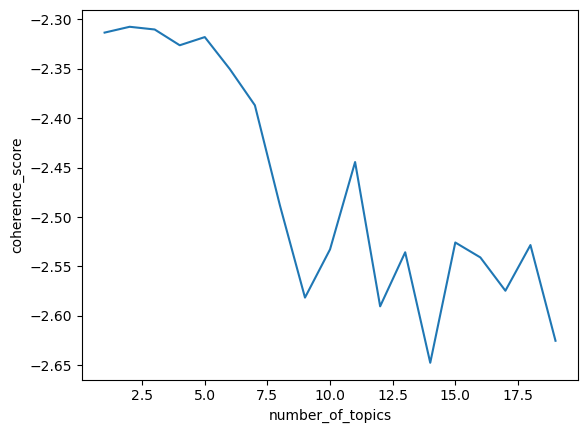

In [20]:
topic_coherence = pd.DataFrame({'number_of_topics': number_of_topics,
                                'coherence_score': coherence_score})
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [21]:
corpus 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(4, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 2),
  (16, 2),
  (17, 1)],
 [(8, 2),
  (10, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(2, 1), (4, 1), (6, 1), (7, 1), (8, 1), (35, 1), (36, 1)],
 [(37, 1), (38, 1), (39, 1)],
 [(4, 2),
  (8, 1),
  (35, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1)],
 [(2, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(1, 1), (4, 1), (46, 1)],
 [(0, 1),
  (1, 1),
  (2, 2),
  (4, 2),
  (5, 2),
  (7, 1),
  (8, 2),
  (10, 1),
  (47, 1),
  (48, 1)],
 [(8, 1),
  (10, 1),
  (14, 1),
  (21, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)],
 [(8, 1),
  (41, 1),
  (51, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1)],
 

   ### Modelling of words running with defined number of topics

In [22]:
# Define the number of topics 
n_topics = 17

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [23]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.000*"01518" + 0.000*"bench" + 0.000*"overshadow" + 0.000*"group" + 0.000*"aliviate" + 0.000*"ipl" + 0.000*"larch" + 0.000*"doubledoors" + 0.000*"38" + 0.000*"shrubs"
Topic: 1 Word: 0.000*"01518" + 0.000*"bench" + 0.000*"overshadow" + 0.000*"group" + 0.000*"aliviate" + 0.000*"ipl" + 0.000*"larch" + 0.000*"doubledoors" + 0.000*"38" + 0.000*"shrubs"
Topic: 2 Word: 0.140*"with" + 0.122*"of" + 0.107*"sign" + 0.096*"and" + 0.073*"illuminate" + 0.067*"associate" + 0.052*"work" + 0.042*"wall" + 0.040*"non" + 0.039*"one"
Topic: 3 Word: 0.179*"of" + 0.161*"use" + 0.118*"change" + 0.101*"to" + 0.082*"from" + 0.057*"as" + 0.056*"class" + 0.041*"residential" + 0.024*"office" + 0.024*"food"
Topic: 4 Word: 0.000*"01518" + 0.000*"bench" + 0.000*"overshadow" + 0.000*"group" + 0.000*"aliviate" + 0.000*"ipl" + 0.000*"larch" + 0.000*"doubledoors" + 0.000*"38" + 0.000*"shrubs"
Topic: 5 Word: 0.000*"01518" + 0.000*"bench" + 0.000*"overshadow" + 0.000*"group" + 0.000*"aliviate" + 0.000*"ipl"

## 7. Visualisation using pyLDAvis

In [24]:
import pyLDAvis.gensim_models
import numpy as np
import pandas as pd

# Enable notebook display
pyLDAvis.enable_notebook()

# Prepare the visualization data
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)

# Convert topic_info to a DataFrame
topic_info_df = pd.DataFrame(vis_data.topic_info)

# Convert token_table to a DataFrame
token_table_df = pd.DataFrame(vis_data.token_table)

# Convert topic_coordinates to a DataFrame and replace complex numbers with real values
topic_coords_df = pd.DataFrame(vis_data.topic_coordinates.applymap(np.real))

# Convert any remaining NaN values to 0
topic_coords_df = topic_coords_df.fillna(0)

# Create a new PreparedData object with the updated data
updated_data = pyLDAvis.PreparedData(topic_coordinates=topic_coords_df,
                                    topic_info=topic_info_df,
                                    token_table=token_table_df,
                                    R=vis_data.R,
                                    lambda_step=vis_data.lambda_step,
                                    plot_opts=vis_data.plot_opts,
                                    topic_order=vis_data.topic_order)

# Display the visualization
pyLDAvis.display(updated_data)
